In [4]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from itertools import permutations
from scipy.special import binom
rng = np.random.default_rng()

In [2]:
def random_partitions(n,m):
    """ this give nearly unweighted random partitions of n in to m parts
    
    nearly unweighted becouse those with symmetry are undercounted in a known way
    
    """
    base = [1 for i in range(m)]
    values = np.arange(m)
    for i in range(n-m):
        r = random.randint(0,m-1)
        # Define the values and their corresponding probabilities


        # Generate a weighted random number
        r = np.random.choice(values, p=np.array(base)/sum(base))
        base[r]+=1
    return tuple(base)


def temporal_multiplicity(base):
    res =1
    while not np.array_equal(base , np.roll(base,res)):
        res+=1
    return res

def weighted_random_partitions(n,m):
    """ this give nearly unweighted random partitions of n in to m parts
    
    nearly unweighted becouse those with symmetry are undercounted in a known way
    
    """
    base = np.array([1 for i in range(m)])
    values = np.arange(m)
    for _ in range(n-m):
        # Define the values and their corresponding probabilities
        weights = []
        for i in range(m):
            
            # consider forcing addition only to those values that are unique in some way. (I.E. if all the values are the same only allow addition to the first one.
            new_base = np.copy(base)
            new_base[i]+=1
            w = num_cdts(new_base)
            weights.append(w)
        
        


        # Generate a weighted random number
        r = np.random.choice(values, p=np.array(weights)*base/sum(weights*base))
        base[r]+=1
    return tuple(base)

import random

def constrained_sum_sample_pos(total,n ):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""
    


    dividers = sorted(rng.choice(range(1, total), n - 1, replace = False))
    return tuple([a - b for a, b in zip(dividers + [total], [0] + dividers)])


import numpy as np

def weighted_constrained_sum_sample_pos(total, n):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is more likely to have a consistent separation."""
    
    #generate 1000 true random possibilities
    possibilities = [constrained_sum_sample_pos(total,n) for _ in range(10)]
    weights = np.array([num_cdts(p) for p in possibilities])
    weights /= np.sum(weights)
    return possibilities[rng.choice(list(range(len(possibilities))),p=weights)]
    





In [3]:
def num_cdts(vp):
    total = 1
    for i,length in enumerate(vp):
        j = (i+1)%len(vp)
        total*= binom(length+vp[j],length)
    return(total)


In [77]:
num_samples = 5000
sample = generate_samples(16*16,16,num_samples,steps = 16)
processed_sample = sample

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [75]:
num_samples = len(processed_sample)

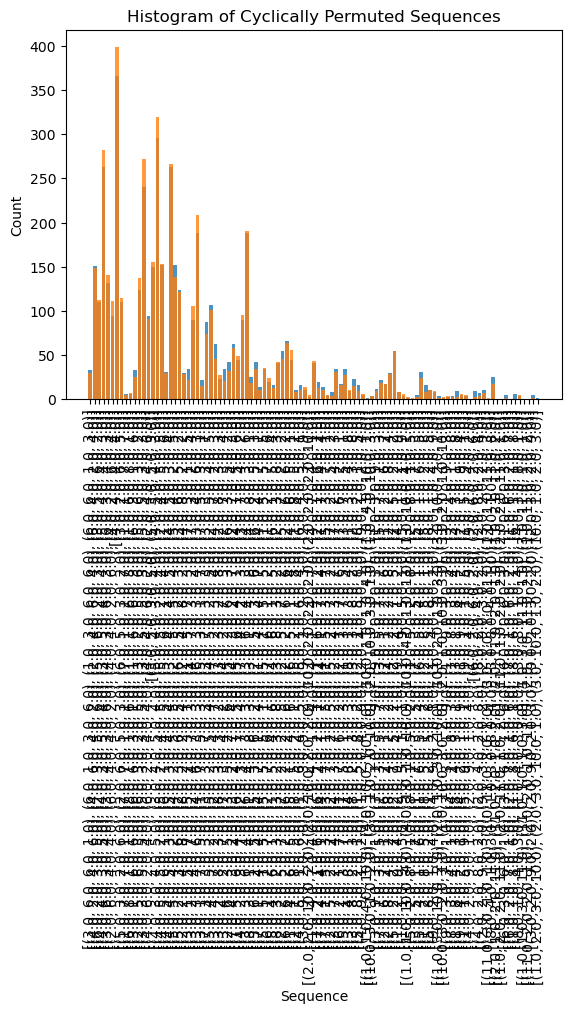

In [76]:

# Function to generate cyclic permutations of a sequence
def cyclic_permutations(seq):
    perms = set()
    n = len(seq)
    for i in range(n):
        perm = np.roll(seq,i)
        perms.add(tuple(perm))
    return frozenset(perms)

# Function to generate all permutations of a sequence
def all_permutations(seq):
    perms = frozenset(permutations(seq))
    return perms

# Count the occurrences of cyclically permutable sequences
sequence_counts = Counter()

for sequence in processed_sample:
    perms = cyclic_permutations(sequence)
    sequence_counts[perms] += 1

# Extract sequences and their corresponding counts
sequences, counts = zip(*sequence_counts.items())

target_counts = []
for sequence in sequences:
    target_counts.append(num_cdts(list(sequence)[0]))
    
    
target_total = sum(target_counts)
for i,target_count in enumerate(target_counts):
    target_counts[i] = target_count/target_total*num_samples

# Create a bar chart to display the counts
x_values = list(range(len(sequences)))

plt.bar(x_values, target_counts,alpha = .8)
plt.bar(x_values, counts,alpha = .8)

plt.xlabel('Sequence')
plt.ylabel('Count')
plt.title('Histogram of Cyclically Permuted Sequences')
plt.xticks(x_values, [list(s) for s in sequences], rotation=90)
plt.show()

In [25]:
def step_function(state):
    l = len(state)
    shuffled_indices = np.random.permutation(l)
    pair_indices = shuffled_indices.reshape(-1, 2)
    pairs = state[pair_indices]
    print(pairs)
    perturbation_amounts = np.random.randint(np.clip(pairs[:, 0],0,2), size=pairs.shape[0])
    print(perturbation_amounts)
    new_state = state.copy()
    new_state[pair_indices[:, 0]] -= perturbation_amounts
    new_state[pair_indices[:, 1]] += perturbation_amounts

    return new_state

def acceptance_function(initial_state,proposed_state):
    l = len(initial_state)
    initial_multiplicity = num_cdts(initial_state)*l/temporal_multiplicity(initial_state)
    proposed_multiplicity = num_cdts(proposed_state)*l/temporal_multiplicity(proposed_state)
    alpha = proposed_multiplicity/initial_multiplicity
    u = rng.random()
    # print(alpha,u,initial_state,proposed_state)
    if u<alpha:
        return proposed_state
    else:
        return initial_state
    
    

In [64]:

def generate_sample(initial_state, steps=10):
    
    state = initial_state
    for _ in range(steps):
        proposed_state = step_function(state)
        state = acceptance_function(state,proposed_state)
    return(state)

def generate_samples(total,n,num_samples,steps = 100):
    remainder = total%n
    start_state = np.array([total//n for _ in range(n)])
    start_state+= np.array([1 if i<remainder else 0 for i in range(n)])
    start_state = np.ones(n)
    start_state[0]+=total-n
    res = [generate_sample(start_state,steps = steps*10)]
    
    for _ in range(num_samples):
        if _%100==0: print(_)
        res.append(generate_sample(res[-1],steps = steps))
    return(res[1:])
    
    

In [26]:
step_function(np.array([3,3,3,3]))

[[3 3]
 [3 3]]
[0 1]


array([2, 4, 3, 3])

In [357]:
%%timeit
step_function(np.array([3,3,3,3]))

30.4 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [369]:
%%timeit
acceptance_function(np.array([3,3,3,3]),np.array([3,4,2,3]))

146 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [354]:
%%timeit
generate_sample(12,4,steps = 1)

119 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [355]:
%%timeit
generate_sample(12,4,steps = 10)

1.24 ms ± 9.71 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
TEST = np.array([1,2,3])

array([1, 2, 2])